The cereal dataset contains information about 95 different breakfast cereals. The cereals data dictionary file contains the names of the variables and what each variable represents. Note that there are 36 non-ID variables in this dataset.

- CerealName - The name of the cereal

- Manufacturer - The company that makes the cereal

- CFBAI.UNC - Whether the cereal meets the Children's Food and Beverage Advertising Initiative (CFBAI) Category-Specific Uniform Nutrition Criteria for Cereals

- CFBAI.Approved - Whether the cereal has been approved by CFBAI for advertising to children. 

- Size - The size (in oz) of a regular-sized box

- Shelf - The shelf (1 = bottom, 5 = top) on which the box's tag was located

- Location - The location (1 = left, 12 = right) on which the box's tag was located

- Price - The regular price (in dollars) of the box at an Albertson's in Irvine, CA on May 1, 2019

- Serving.Size - The size (in grams) of a single serving of cereal

- Calories - The number of calories in a single serving

- Total.Fat - The total amount of fat (in g) in a single serving

- Saturated.Fat - The amount of saturated fat (in g) in a single serving

- Sodium - The amount of sodium (in mg) in a single serving

- Potassium - The amount of potassium (in mg) in a single serving

- Total.Carbohydrate - The total amount of carbohydrates (in g) in a single serving

- Dietary.Fiber - The amount of dietary fiber (in g) in a single serving

- Sugar - The amount of sugar (in g) in a single serving, including natural and added sugars

- Protein	- The amount of protein (in g) in a single serving

- Vitamin.A - The % recommended daily value of Vitamin A in a single serving

- Vitamin.C - The % recommended daily value of Vitamin C in a single serving

- Calcium - The % recommended daily value of calcium in a single serving

- Iron - The % recommended daily value of iron in a single serving

- Vitamin.D - The % recommended daily value of Vitamin D in a single serving

- Vitamin.E - The % recommended daily value of Vitamin E in a single serving

- Thiamin - The % recommended daily value of thiamin (Vitamin B1) in a single serving

- Riboflavin - The % recommended daily value of riboflavin (Vitamin B2) in a single serving

- Niacin - The % recommended daily value of niacin (Vitamin B3) in a single serving

- Pantothenic.Acid - The % recommended daily value of pantothenic acid (Vitamin B5) in a single serving

- Vitamin.B6 - The % recommended daily value of Vitamin B6 in a single serving

- Folic.Acid - The % recommended daily value of folic acid (folate) in a single serving

- Vitamin.B12 - The % recommended daily value of Vitamin B12 in a single serving

- Zinc - The % recommended daily value of zinc in a single serving

- Magnesium - The % recommended daily value of magnesium in a single serving

- Phosphorus - The % recommended daily value of phosphorus in a single serving

- Selenium - The % recommended daily value of selenium in a single serving

- Copper - The % recommended daily value of copper in a single serving

- Manganese - The % recommended daily value of manganese in a single serving


In [101]:
cereal = read.csv("cereal.csv", h=T)
#attach(cereal)

In [102]:
summary(cereal$Manufacturer)

General Mills     Kellogg's          Post        Quaker 
           29            33            23            10

We can see there are 4 manufacturers. I want find out more information such as mean, variance, and median about the nutritional facts in question: calories, total fat, saturated fat, sodium, carbohydrates, dietary fiber, sugar, and protein.

In [103]:
library(ggplot2)
library(tidyverse)

I will look at a summary, boxplot, and histrogram for each nutritional fact separated by Manufacturer.

In [104]:
cal.sum = cereal%>%group_by(Manufacturer) %>% summarize( mean=mean(Calories), var = var(Calories), median = median(Calories))
cal.sum

Manufacturer,mean,var,median
<fct>,<dbl>,<dbl>,<dbl>
General Mills,123.4483,887.6847,120
Kellogg's,155.4545,2281.8182,150
Post,143.4783,1069.1700,130
Quaker,138.0000,2217.7778,120


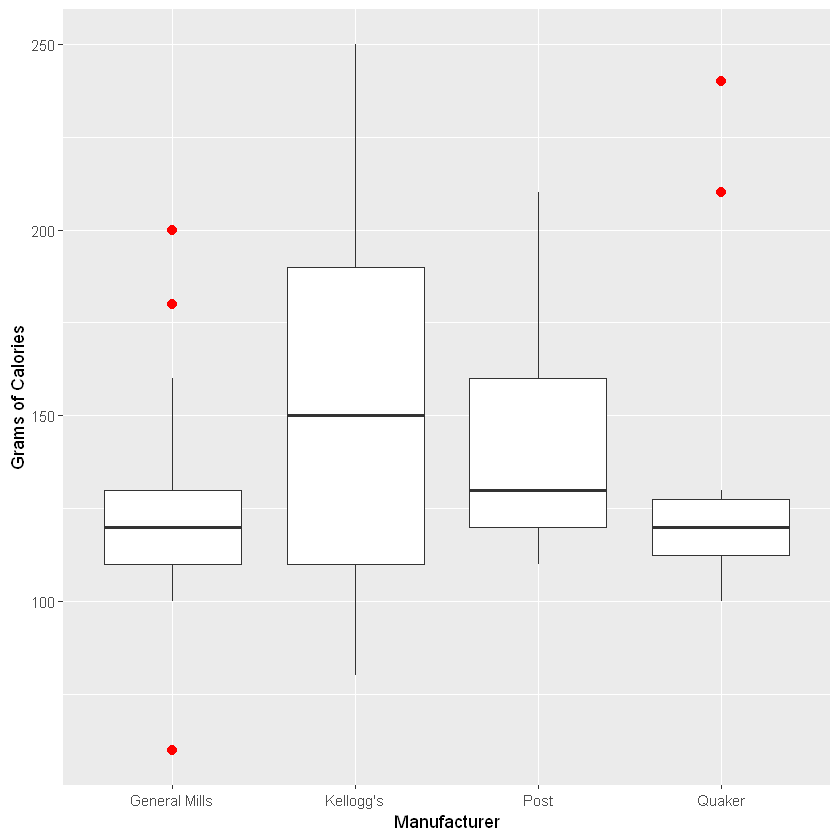

In [105]:
box.cal = ggplot(cereal, aes(x = Manufacturer, y = Calories )) +
        geom_boxplot(outlier.colour = "red", outlier.shape = 20,outlier.size=4) + 
    xlab("Manufacturer") + ylab("Grams of Calories") + scale_fill_grey() 
box.cal

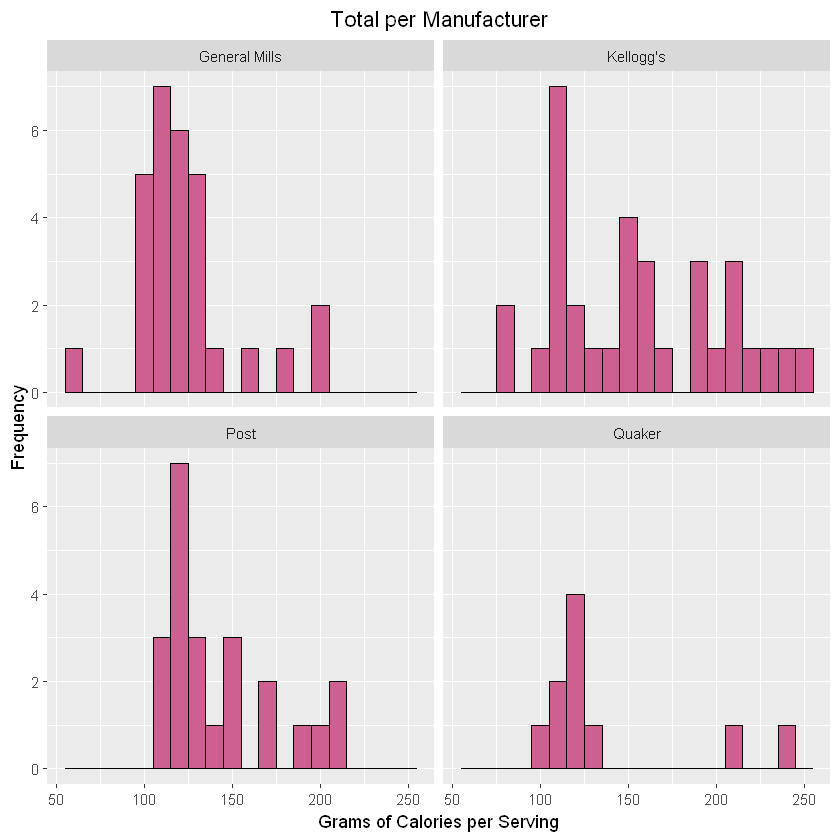

In [106]:
hist.cal = ggplot(cereal, aes(x=Calories)) + geom_histogram(binwidth=10, color = "black", fill="hotpink3") +
    facet_wrap(.~Manufacturer) + xlab("Grams of Calories per Serving") + ylab("Frequency") + 
    ggtitle("Total per Manufacturer") + theme(plot.title = element_text(hjust = 0.5))
hist.cal

We can see Kellogg's has the largest calorie mean and variance and while General Mills has the smallest. 

In [107]:
fat.sum = cereal%>%group_by(Manufacturer) %>% summarize( mean=mean(Total.Fat), var = var(Total.Fat), median = median(Total.Fat))
fat.sum

Manufacturer,mean,var,median
<fct>,<dbl>,<dbl>,<dbl>
General Mills,1.689655,0.9181034,1.5
Kellogg's,1.287879,2.9067235,1.0
Post,1.869565,1.6867589,1.5
Quaker,2.250000,2.9583333,1.5


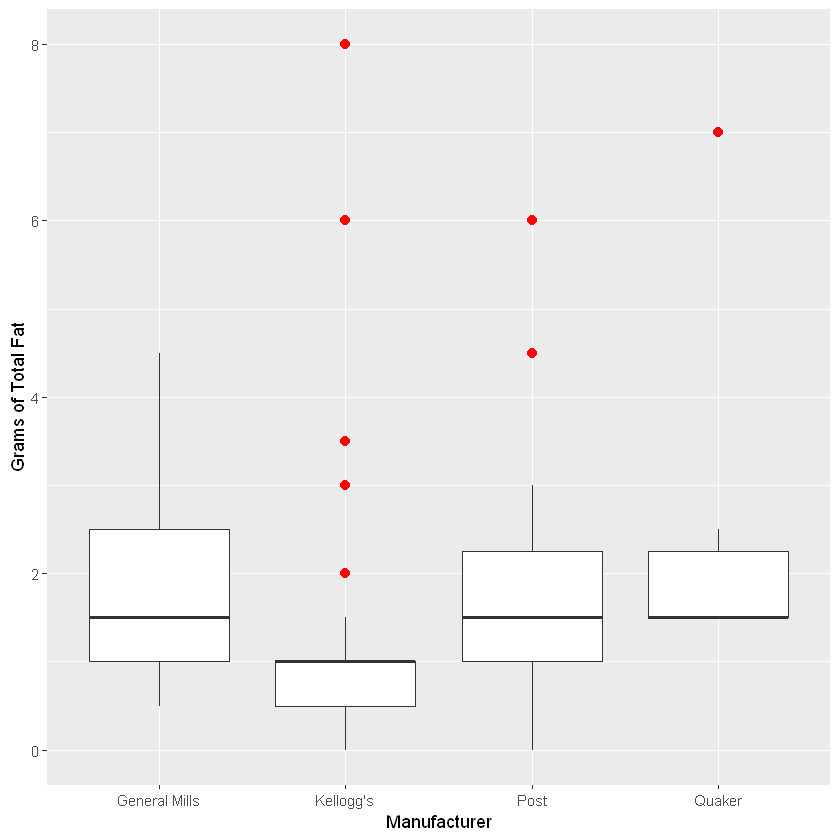

In [108]:
box.tfat = ggplot(cereal, aes(x = Manufacturer, y = Total.Fat )) +
    geom_boxplot(outlier.colour = "red", outlier.shape = 20, outlier.size=4) + xlab("Manufacturer") + 
    ylab("Grams of Total Fat") + scale_fill_grey() 

box.tfat

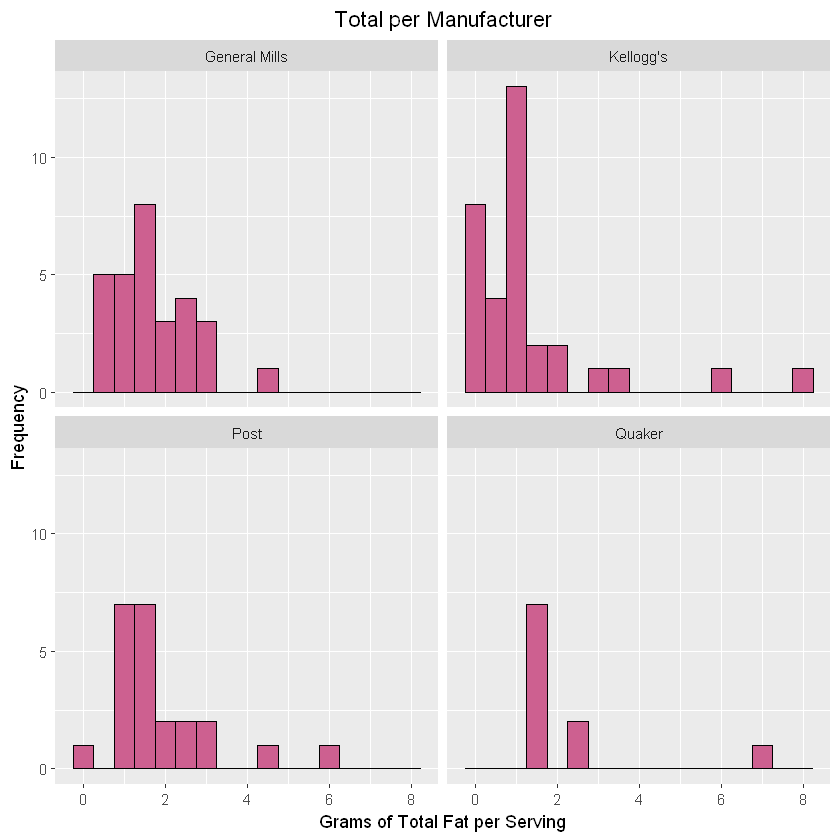

In [109]:
hist.tfat = ggplot(cereal, aes(x=Total.Fat)) + geom_histogram(binwidth=0.5, color = "black", fill="hotpink3") +
    facet_wrap(.~Manufacturer) + xlab("Grams of Total Fat per Serving") + ylab("Frequency") + 
    ggtitle("Total per Manufacturer") + theme(plot.title = element_text(hjust = 0.5))
hist.tfat

We can see Quaker has the largest total fat mean and variance while Kellogg's has the smallest mean and median but a high variance.

In [110]:
satfat.sum = cereal%>%group_by(Manufacturer) %>% summarize(mean=mean(Saturated.Fat), var = var(Saturated.Fat), median = median(Saturated.Fat))
satfat.sum

Manufacturer,mean,var,median
<fct>,<dbl>,<dbl>,<dbl>
General Mills,0.1551724,0.0911330,0.0
Kellogg's,0.3484848,0.6013258,0.0
Post,0.3478261,1.1235178,0.0
Quaker,0.4500000,0.1916667,0.5


We can see that most of the cereals manufactured by General Mills, Kellogg's and Post have no saturated fat while Quake has a median of 0.5 grams.

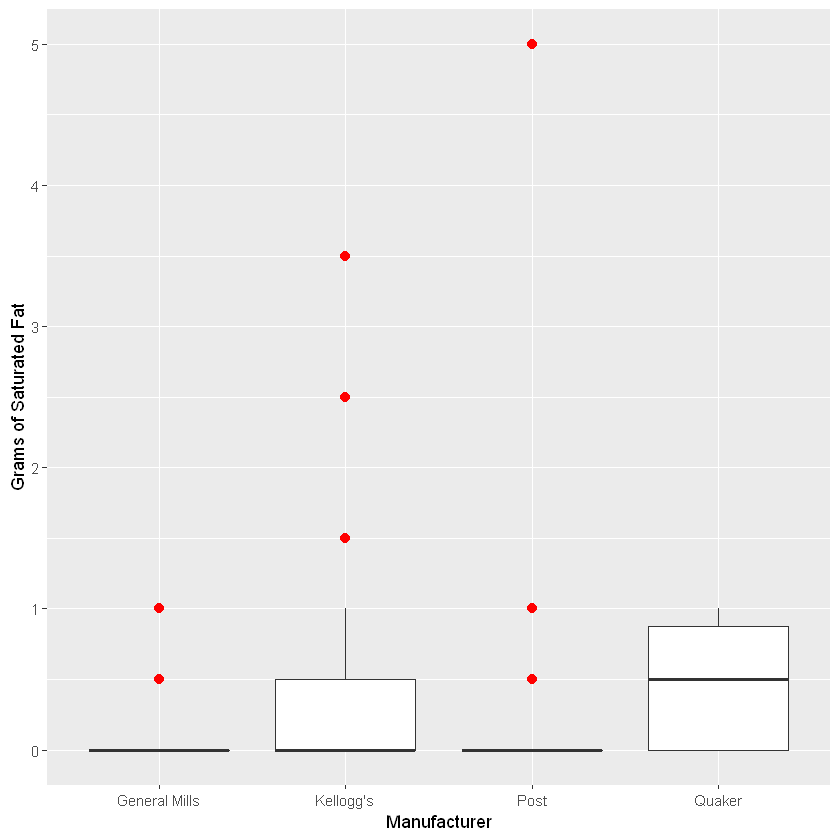

In [111]:
box.satfat = ggplot(cereal, aes(x = Manufacturer, y = Saturated.Fat )) + 
    geom_boxplot(outlier.colour = "red", outlier.shape = 20,outlier.size=4) + xlab("Manufacturer") + 
    ylab("Grams of Saturated Fat") + scale_fill_grey() 
box.satfat

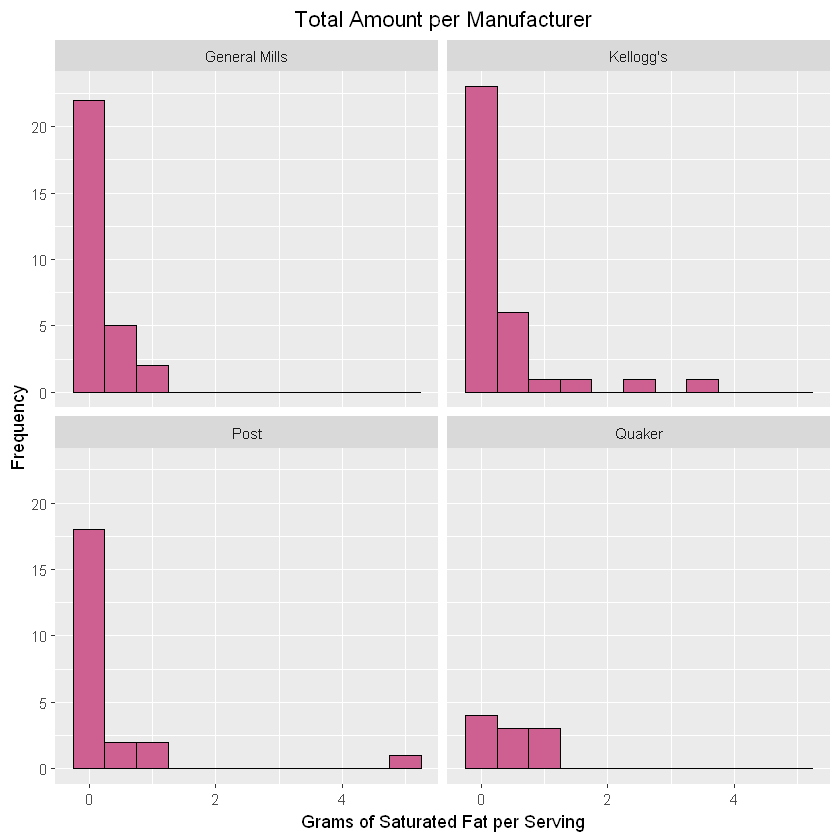

In [112]:
hist.satfat = ggplot(cereal, aes(x=Saturated.Fat)) + geom_histogram(binwidth=0.5, color = "black", fill="hotpink3") +
    facet_wrap(.~Manufacturer) + xlab("Grams of Saturated Fat per Serving") + ylab("Frequency") + 
    ggtitle("Total Amount per Manufacturer") + theme(plot.title = element_text(hjust = 0.5))
hist.satfat

In [113]:
sodium.sum = cereal%>%group_by(Manufacturer) %>% summarize(mean=mean(Sodium), var = var(Sodium), median = median(Sodium))
sodium.sum

Manufacturer,mean,var,median
<fct>,<dbl>,<dbl>,<dbl>
General Mills,176.0690,1918.495,180
Kellogg's,153.3333,6258.854,150
Post,148.2609,4571.838,150
Quaker,166.0000,2404.444,175


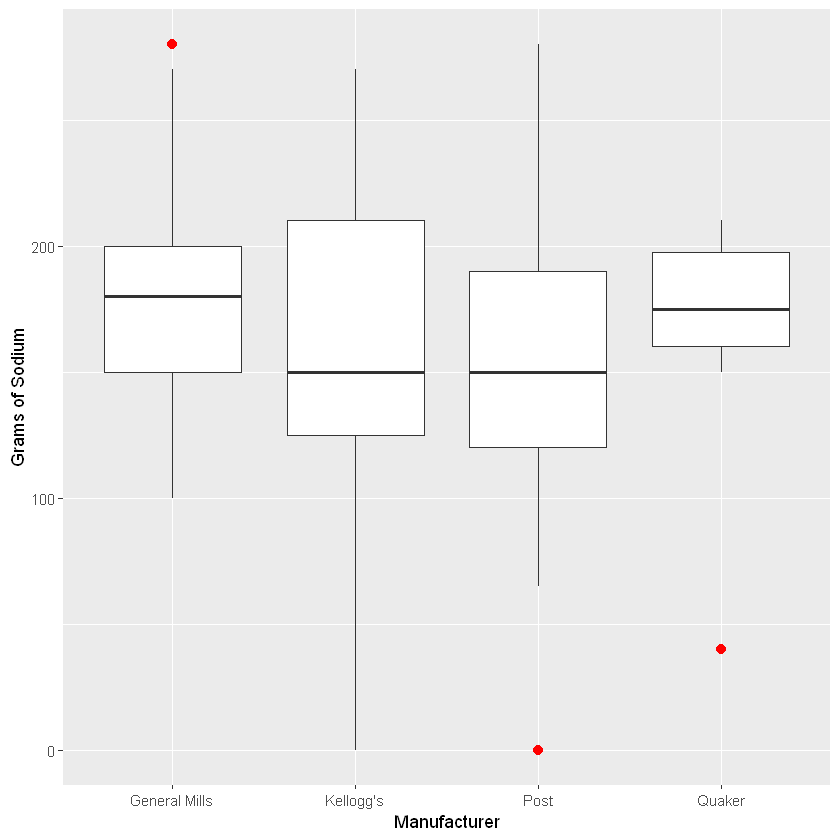

In [114]:
box.sodium = ggplot(cereal, aes(x = Manufacturer, y = Sodium )) + 
    geom_boxplot(outlier.colour = "red", outlier.shape = 20,outlier.size=4) + xlab("Manufacturer") + 
    ylab("Grams of Sodium") + scale_fill_grey() 
box.sodium

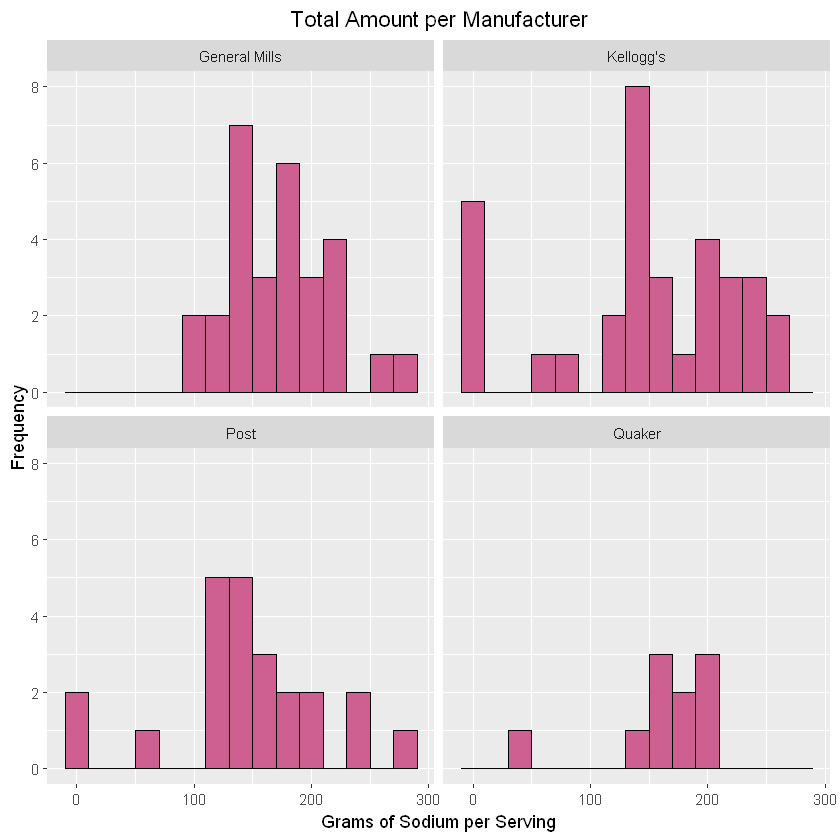

In [115]:
hist.sodium = ggplot(cereal, aes(x=Sodium)) + geom_histogram(binwidth=20, color = "black", fill="hotpink3") +
    facet_wrap(.~Manufacturer) + xlab("Grams of Sodium per Serving") + ylab("Frequency") + 
    ggtitle("Total Amount per Manufacturer") + theme(plot.title = element_text(hjust = 0.5))
hist.sodium

We can see General Mills has a greater amount of sodium in its cereals than the other manufacturers.

In [116]:
carb.sum = cereal%>%group_by(Manufacturer) %>% summarize(mean=mean(Total.Carbohydrate), var = var(Total.Carbohydrate), 
                                                         median = median(Total.Carbohydrate))
carb.sum

Manufacturer,mean,var,median
<fct>,<dbl>,<dbl>,<dbl>
General Mills,26.86207,36.12315,25
Kellogg's,35.33333,100.29167,34
Post,30.82609,74.87747,26
Quaker,27.90000,63.43333,25


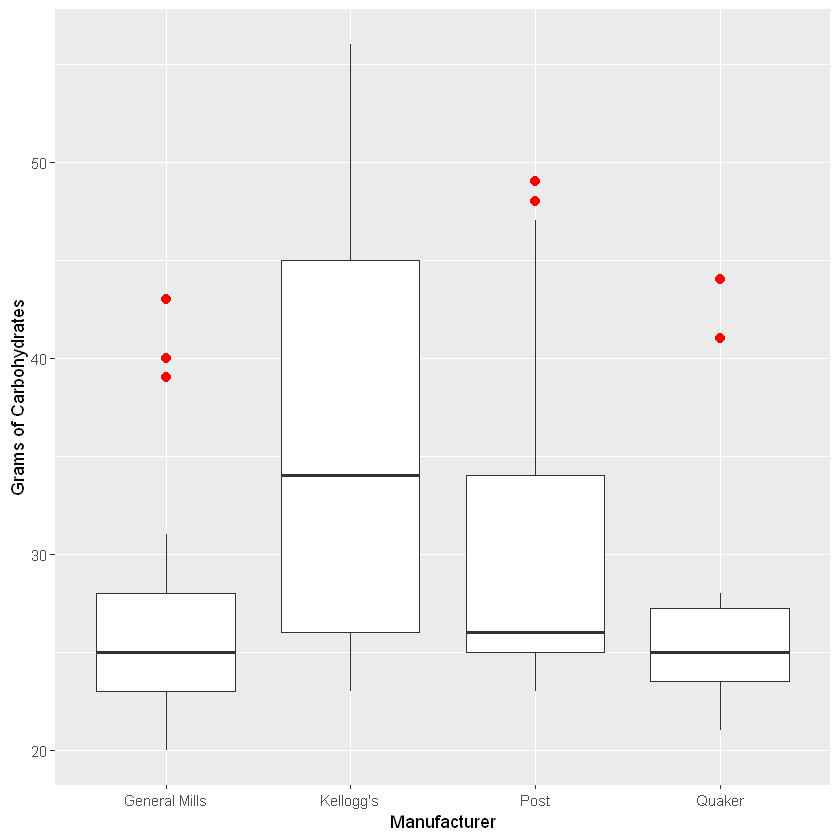

In [117]:
box.carb = ggplot(cereal, aes(x = Manufacturer, y = Total.Carbohydrate )) +
    geom_boxplot(outlier.colour = "red", outlier.shape = 20,outlier.size=4) + xlab("Manufacturer") + 
    ylab("Grams of Carbohydrates") + scale_fill_grey() 
box.carb

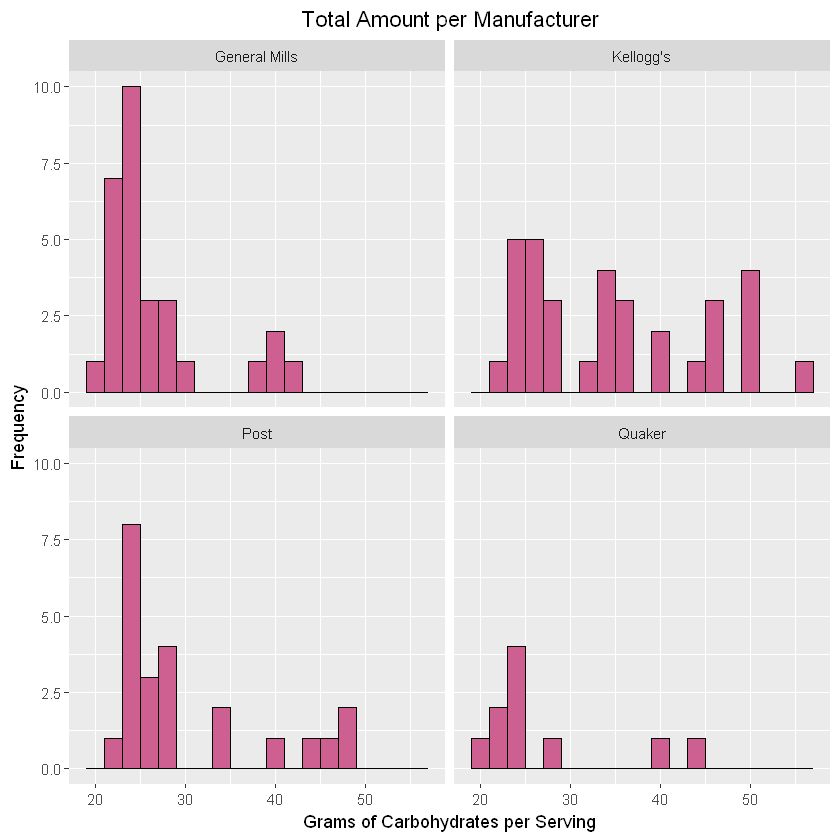

In [118]:
hist.carb = ggplot(cereal, aes(x=Total.Carbohydrate)) + geom_histogram(binwidth=2, color = "black", fill="hotpink3") +
    facet_wrap(.~Manufacturer) + xlab("Grams of Carbohydrates per Serving") + ylab("Frequency") + 
    ggtitle("Total Amount per Manufacturer") + theme(plot.title = element_text(hjust = 0.5))
hist.carb

Kellogg's has the highest amount of carbohydrates in its cereals with a large variance of 100 grams.

In [119]:
fiber.sum = cereal%>%group_by(Manufacturer) %>% summarize(mean=mean(Dietary.Fiber), var = var(Dietary.Fiber), 
                                                          median = median(Dietary.Fiber))
fiber.sum

Manufacturer,mean,var,median
<fct>,<dbl>,<dbl>,<dbl>
General Mills,2.551724,7.113300,2
Kellogg's,3.303030,9.092803,3
Post,2.565217,9.984190,1
Quaker,1.600000,2.711111,2


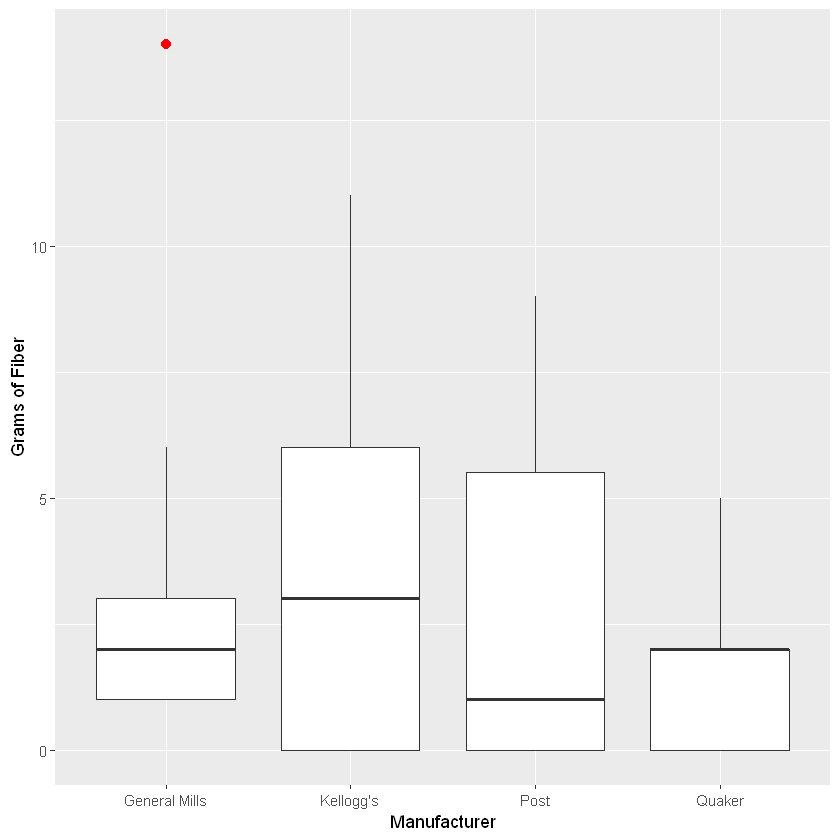

In [120]:
box.fiber = ggplot(cereal, aes(x = Manufacturer, y = Dietary.Fiber )) +
    geom_boxplot(outlier.colour = "red", outlier.shape = 20,outlier.size=4) + xlab("Manufacturer") + 
    ylab("Grams of Fiber") + scale_fill_grey() 
box.fiber

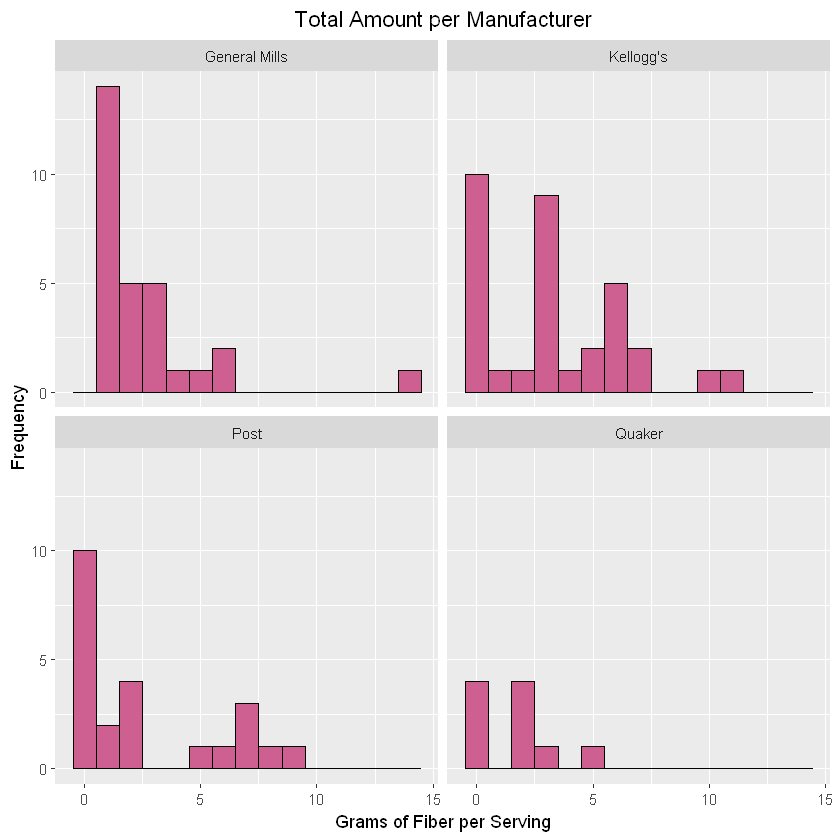

In [121]:
hist.fiber = ggplot(cereal, aes(x=Dietary.Fiber)) + geom_histogram(binwidth=1, color = "black", fill="hotpink3") +
    facet_wrap(.~Manufacturer) + xlab("Grams of Fiber per Serving") + ylab("Frequency") + 
    ggtitle("Total Amount per Manufacturer") + theme(plot.title = element_text(hjust = 0.5))
hist.fiber

Kellogg's includes more fiber in its cereals than the other manufacturers. 

In [122]:
sugar.sum = cereal%>%group_by(Manufacturer) %>% summarize( mean=mean(Sugar), var = var(Sugar), median = median(Sugar))
sugar.sum

Manufacturer,mean,var,median
<fct>,<dbl>,<dbl>,<dbl>
General Mills,7.482759,12.97291,9
Kellogg's,10.909091,13.77273,11
Post,10.217391,24.72332,11
Quaker,9.600000,10.93333,9


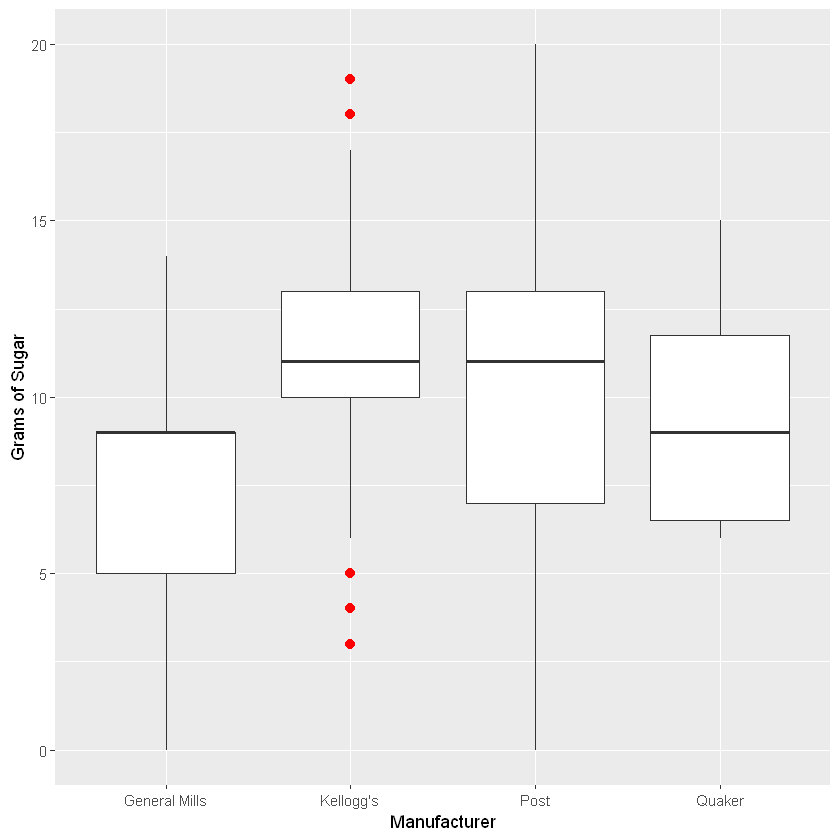

In [123]:
box.sugar = ggplot(cereal, aes(x = Manufacturer, y = Sugar )) +
    geom_boxplot(outlier.colour = "red", outlier.shape = 20,outlier.size=4) + xlab("Manufacturer") + 
    ylab("Grams of Sugar") + scale_fill_grey() 
box.sugar

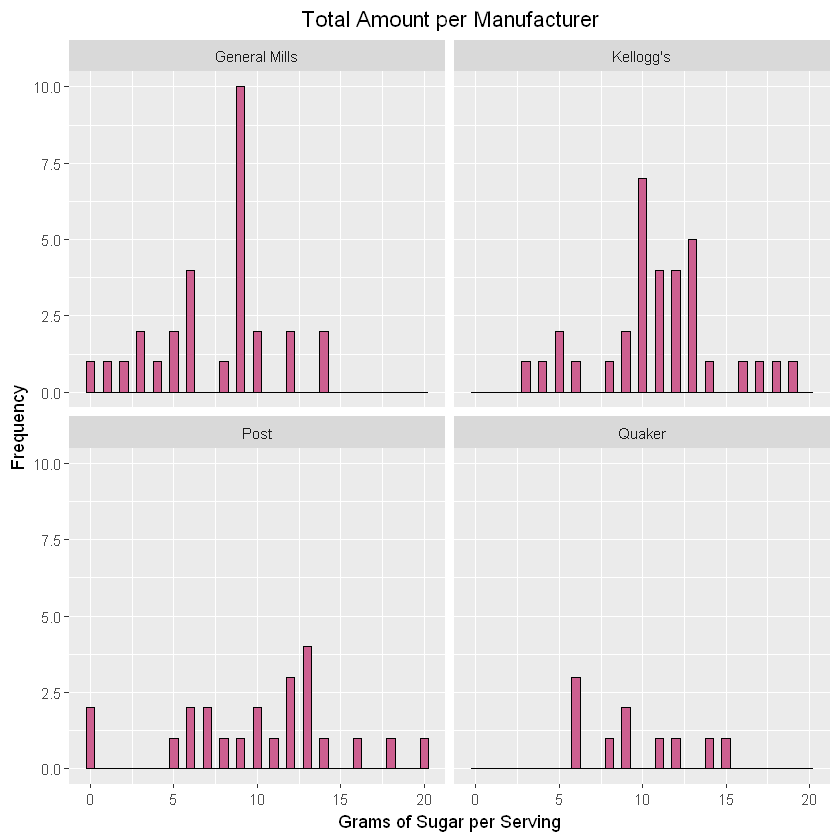

In [124]:
hist.sugar = ggplot(cereal, aes(x=Sugar)) + geom_histogram(binwidth=0.5, color = "black", fill="hotpink3") +
    facet_wrap(.~Manufacturer) + xlab("Grams of Sugar per Serving") + ylab("Frequency") + 
    ggtitle("Total Amount per Manufacturer") + theme(plot.title = element_text(hjust = 0.5))
hist.sugar

Kellogg's and Post have more sugar in their cereals that General Mills and Quaker.

In [125]:
protein.sum = cereal%>%group_by(Manufacturer) %>% summarize( mean=mean(Protein), var = var(Protein), median = median(Protein))
protein.sum

Manufacturer,mean,var,median
<fct>,<dbl>,<dbl>,<dbl>
General Mills,2.034483,0.9630542,2
Kellogg's,3.272727,2.4545455,3
Post,2.652174,3.8735178,2
Quaker,2.800000,2.8444444,3


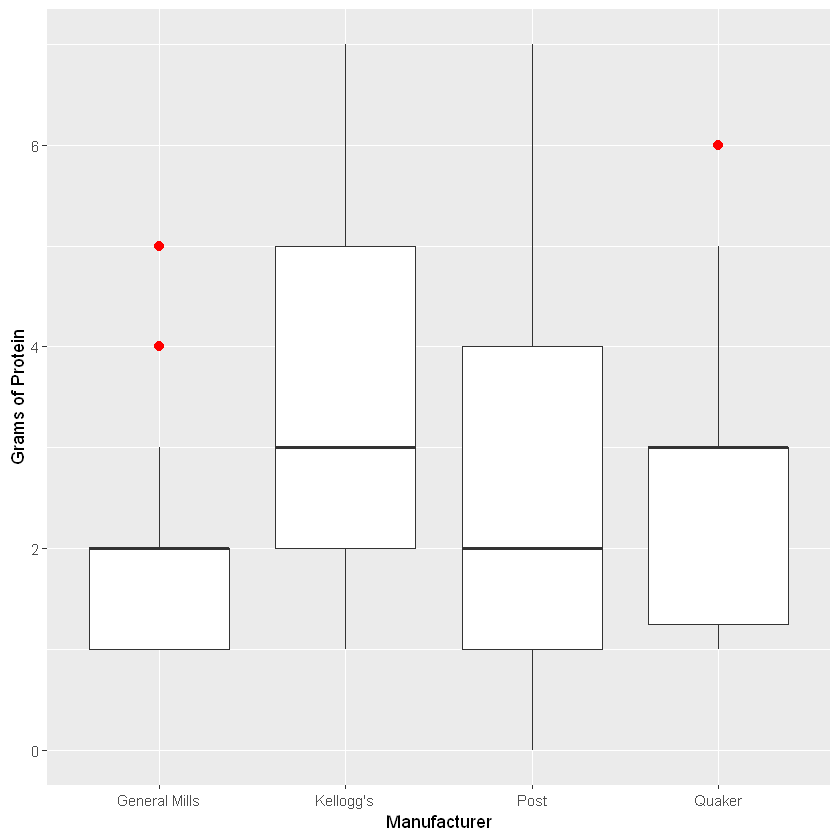

In [126]:
box.protein = ggplot(cereal, aes(x = Manufacturer, y = Protein )) +
    geom_boxplot(outlier.colour = "red", outlier.shape = 20,outlier.size=4) + xlab("Manufacturer") + 
    ylab("Grams of Protein") + scale_fill_grey() 
box.protein

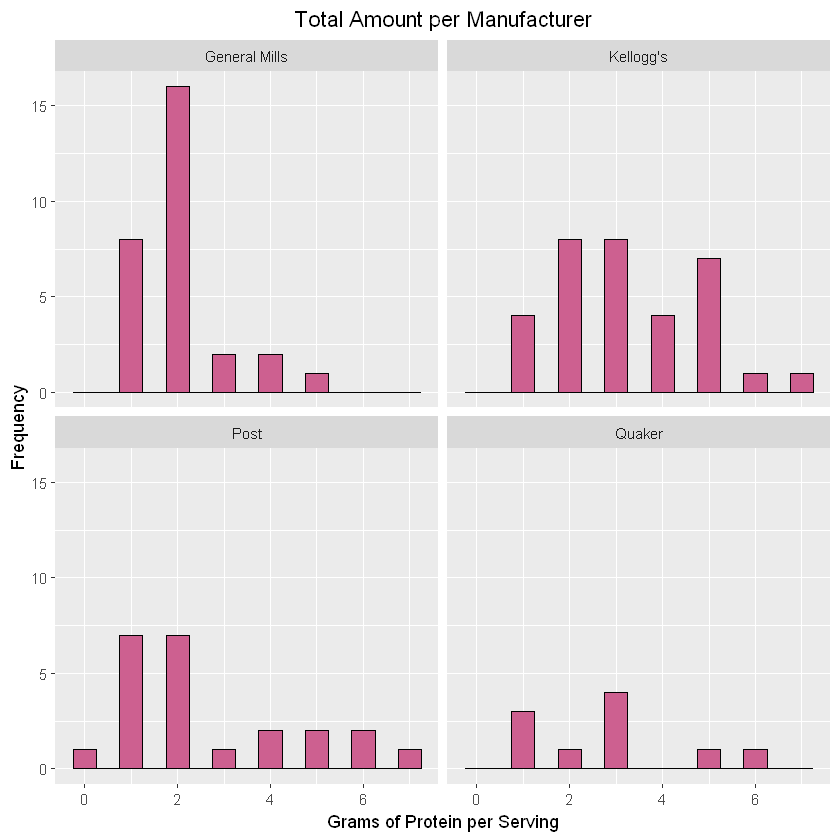

In [127]:
hist.protein = ggplot(cereal, aes(x=Protein)) + geom_histogram(binwidth=0.5, color = "black", fill="hotpink3") +
    facet_wrap(.~Manufacturer) + xlab("Grams of Protein per Serving") + ylab("Frequency") + 
    ggtitle("Total Amount per Manufacturer") + theme(plot.title = element_text(hjust = 0.5))
hist.protein

General Mills includes slightly less protein in their cereal than the other manufacturers while Kellogg's includes slightly more. 

I will perform Principle Component Analysis. 

In [128]:
cereal1 = cereal %>% mutate(Cereal.Name = NULL)%>% mutate(Manufacturer = as.numeric(Manufacturer))%>% 
    mutate (CFBAI.UNC = as.numeric(CFBAI.UNC))%>% mutate(CFBAI.Approved = as.numeric(CFBAI.Approved))
cereal1 = na.omit(cereal1)

In [129]:
library(recipes)
cereal.recipe = recipe(~Total.Fat+Sugar+Total.Carbohydrate+Protein+Manufacturer, data = cereal1)

In [130]:
cereal.recipe %>% 
  step_center(all_numeric()) %>%  # recipe step 1: center numerical variables to mean 0
  step_scale(all_numeric()) %>% # recipe step 2: scale numerical to sd 1
  step_pca(all_numeric()) -> cereal_final_recipe  # recipe step 3: do PCA

In [131]:
cereal.prepped = prep(cereal_final_recipe, training = cereal1, retain= TRUE)
pcs = juice(cereal.prepped)
pcs

PC1,PC2,PC3,PC4,PC5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.3936261,0.8788815429,-0.2646271,0.64795732,0.922140070
-0.6330451,-0.1827425981,-0.4624962,-0.25449198,0.269723843
1.2208873,0.3652380277,1.4246021,-0.79624410,-0.102431716
-1.6388996,-0.2063174575,1.1075056,0.28548794,-0.330680494
-1.6729533,1.1717595572,1.0657907,1.17307817,0.411097926
1.0597118,-1.3293383159,2.3467208,-0.15667140,-0.193783066
-0.4755180,-1.4047065278,-1.1408339,0.46550942,-0.067203516
-0.9798985,-0.1751210670,1.2156905,0.07055437,0.066911694
-0.6330451,-0.1827425981,-0.4624962,-0.25449198,0.269723843


In [132]:
loadings.out = tidy(cereal.prepped, number = 3)

In [133]:
PC.names = unique(loadings.out$component)
term.names  = unique(loadings.out$terms)

In [138]:
loadings.matrix = matrix(loadings.out$value, nrow = length(term.names), ncol = length(PC.names))
rownames(loadings.matrix) = term.names
colnames(loadings.matrix) = PC.names

Warning message:
"Setting row names on a tibble is deprecated."


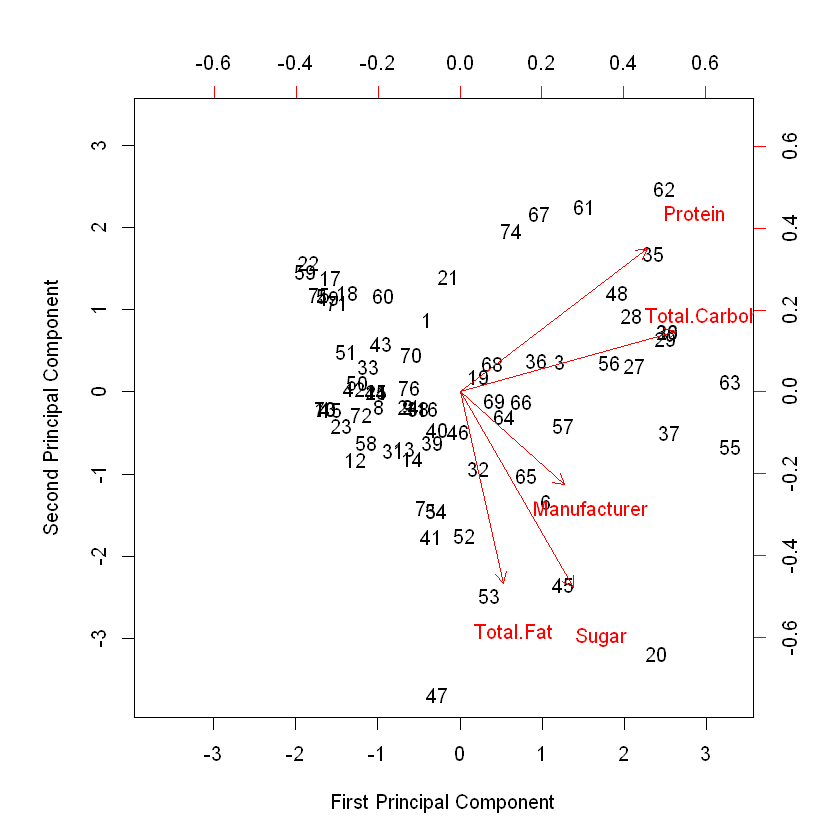

In [139]:
biplot(pcs[,1:2], loadings.matrix[,1:2], xlab = "First Principal Component", ylab = "Second Principal Component")

Observing the histograms for the nutritional facts in question, we see that the distributions are not normal. I will use the non-parametric Kruskal Wallis test to test the following hypothesis for each nutritional fact in question:

Null hypothesis - $H_0$: The median of the nutritional fact in question is the same for each Manufacturers. 

Alternative hypothesis - $H_A$: The median of the nutritional fact in question varies among Manufacturers.

In [140]:
library(coin)

In [141]:
cal.hyp=kruskal_test(Calories~Manufacturer, data = cereal, distribution=approximate(nresample=10000))
cal.hyp


	Approximative Kruskal-Wallis Test

data:  Calories by
	 Manufacturer (General Mills, Kellogg's, Post, Quaker)
chi-squared = 9.3256, p-value = 0.0222


Our p-value is less than our 5% significance level, therefore we can reject the null hypothesis and claim that the median of calories is different between manufacturers. 

In [142]:
tfat.hyp = kruskal_test(Total.Fat~Manufacturer, data = cereal, distribution=approximate(nresample=10000))
tfat.hyp


	Approximative Kruskal-Wallis Test

data:  Total.Fat by
	 Manufacturer (General Mills, Kellogg's, Post, Quaker)
chi-squared = 15.211, p-value = 0.0016


Our p-value is less than our 5% significance level, therefore we can reject the null hypothesis and claim that the median of total fat is different between manufacturers. 

In [143]:
satfat.hyp=kruskal_test(Saturated.Fat~Manufacturer, data = cereal, distribution=approximate(nresample=10000))
satfat.hyp


	Approximative Kruskal-Wallis Test

data:  Saturated.Fat by
	 Manufacturer (General Mills, Kellogg's, Post, Quaker)
chi-squared = 5.3532, p-value = 0.1445


Our p-value is greater than 5% significance level therefore we accept our null hypothesis and claim that the median of saturated fat is the same among Manufacturers.

In [144]:
sod.hyp = kruskal_test(Sodium~Manufacturer, data = cereal, distribution=approximate(nresample=10000))
sod.hyp


	Approximative Kruskal-Wallis Test

data:  Sodium by
	 Manufacturer (General Mills, Kellogg's, Post, Quaker)
chi-squared = 2.7794, p-value = 0.4347


Our p-value is greater than 5% significance level therefore we accept our null hypothesis and claim that the median of sodium is the same among Manufacturers.

In [145]:
carb.hyp = kruskal_test(Total.Carbohydrate~Manufacturer, data = cereal, distribution=approximate(nresample=10000))
carb.hyp


	Approximative Kruskal-Wallis Test

data:  Total.Carbohydrate by
	 Manufacturer (General Mills, Kellogg's, Post, Quaker)
chi-squared = 18.914, p-value = 3e-04


Our p-value is less than our 5% significance level, therefore we can reject the null hypothesis and claim that the median of carbohydrates is different between manufacturers. 

In [146]:
fiber.hyp =kruskal_test(Dietary.Fiber~Manufacturer, data = cereal, distribution=approximate(nresample=10000))
fiber.hyp


	Approximative Kruskal-Wallis Test

data:  Dietary.Fiber by
	 Manufacturer (General Mills, Kellogg's, Post, Quaker)
chi-squared = 3.4908, p-value = 0.3243


Our p-value is greater than 5% significance level therefore we accept our null hypothesis and claim that the median of fiber is the same among Manufacturers.

In [147]:
sugar.hyp = kruskal_test(Sugar~Manufacturer, data = cereal, distribution=approximate(nresample=10000))
sugar.hyp


	Approximative Kruskal-Wallis Test

data:  Sugar by
	 Manufacturer (General Mills, Kellogg's, Post, Quaker)
chi-squared = 12.706, p-value = 0.0042


Our p-value is less than our 5% significance level, therefore we can reject the null hypothesis and claim that the median of sugar is different between manufacturers.

In [148]:
protein.hyp = kruskal_test(Protein~Manufacturer, data = cereal, distribution=approximate(nresample=10000))
protein.hyp


	Approximative Kruskal-Wallis Test

data:  Protein by
	 Manufacturer (General Mills, Kellogg's, Post, Quaker)
chi-squared = 10.262, p-value = 0.012


Our p-value is less than our 5% significance level, therefore we can reject the null hypothesis and claim that the median of protein is different between manufacturers.

We can see that the cereal produced by each Manufacturer has similar amounts of saturated fat, sodium, and fiber. However, the amounts of calories, total fat, carbohydrates, sugar, and protein differ for each Manufacturer.

I will create trees to predict Manufacturer based on calories, total fat, carbohydrates, sugar, and protein.

In [149]:
cereal1 = cereal %>% mutate(Cereal.Name = NULL)%>%mutate(CFBAI.Approved = NULL)
cereal1 = na.omit(cereal1)

In [150]:
library(rpart)

In [151]:
tree.nut = rpart(Manufacturer~Calories+Total.Fat+Total.Carbohydrate+Sugar+Protein, data = cereal1)

n= 85 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 85 56 Kellogg's (0.30588235 0.34117647 0.24705882 0.10588235)  
   2) Total.Fat< 1.25 40 17 Kellogg's (0.25000000 0.57500000 0.17500000 0.00000000)  
     4) Sugar< 9.5 19 10 General Mills (0.47368421 0.36842105 0.15789474 0.00000000) *
     5) Sugar>=9.5 21  5 Kellogg's (0.04761905 0.76190476 0.19047619 0.00000000) *
   3) Total.Fat>=1.25 45 29 General Mills (0.35555556 0.13333333 0.31111111 0.20000000)  
     6) Sugar< 10.5 23 11 General Mills (0.52173913 0.00000000 0.21739130 0.26086957)  
      12) Total.Carbohydrate< 24.5 10  1 General Mills (0.90000000 0.00000000 0.00000000 0.10000000) *
      13) Total.Carbohydrate>=24.5 13  8 Post (0.23076923 0.00000000 0.38461538 0.38461538) *
     7) Sugar>=10.5 22 13 Post (0.18181818 0.27272727 0.40909091 0.13636364)  
      14) Protein>=2.5 10  4 Kellogg's (0.30000000 0.60000000 0.10000000 0.00000000) *
      15) Protein< 2.5 12  4 Post (0.08333333 0.000000

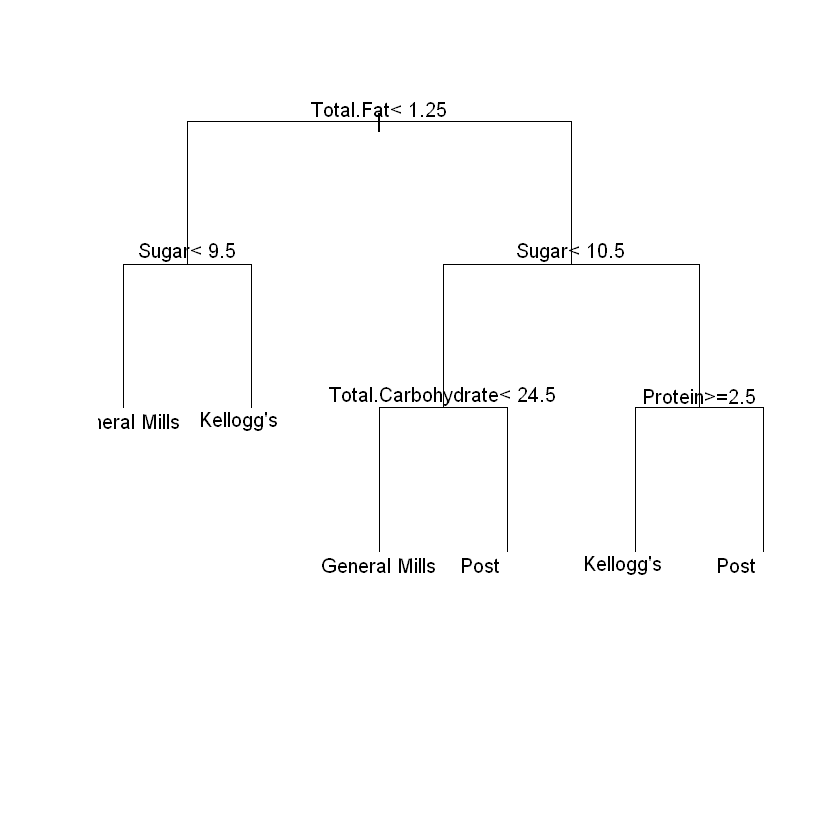

In [153]:
plot(tree.nut, uniform = TRUE, ylim = c(0, 1))
text(tree.nut, pretty = 0)
tree.nut

We can use the tree above to predict which Manufacturer a cereal belongs to based on total fat, sugar, carbohydrates, and protein. It appears that General Mills is the healthier option. 

# Regression

Seven cereals in the dataset were not available for purchase at the local supermarket and thus have missing values for the variable Price. These cereals form a natural test set; that is, we do not know their values. I will explore several different methods for predicting the price of those cereals to assess and select the model that is best for predicting Price.

In [154]:
library(dplyr)
library(leaps)

In [155]:
new.cereal = cereal %>% filter(!is.na(Price)) %>% mutate(Cereal.Name = NULL)%>% 
    mutate(Manufacturer = as.numeric(Manufacturer))%>% mutate (CFBAI.UNC = as.numeric(CFBAI.UNC))%>% 
    mutate(CFBAI.Approved = as.numeric(CFBAI.Approved)) # used to remove rows that do not have an indicated price and 
    # turn qualitative variables into numerical values

In [156]:
dim(cereal)
dim(new.cereal)

[1] 95 37

[1] 88 36

Seven of the cereals did not have a price listed so our new full data set will include 88 observations. I also removed the variable Cereal Name as it is just an ID and does not provide us with any information.

We still have some missing data so I will removed those observations as well.

In [157]:
new.cereal = na.omit(new.cereal)
dim(new.cereal)

[1] 76 36

Our new data set contains 76  observations.

I split the data into train and test sets. I will make a 85/15 split.

In [158]:
set.seed(183)
train = sample(nrow(new.cereal),nrow(new.cereal)*.85)
train.cereal = new.cereal[train,]
test.cereal = new.cereal[-train,]

First, I will perform best subset selection.

In [159]:
bestsub = regsubsets(Price~., data = train.cereal, nvmax = 35)

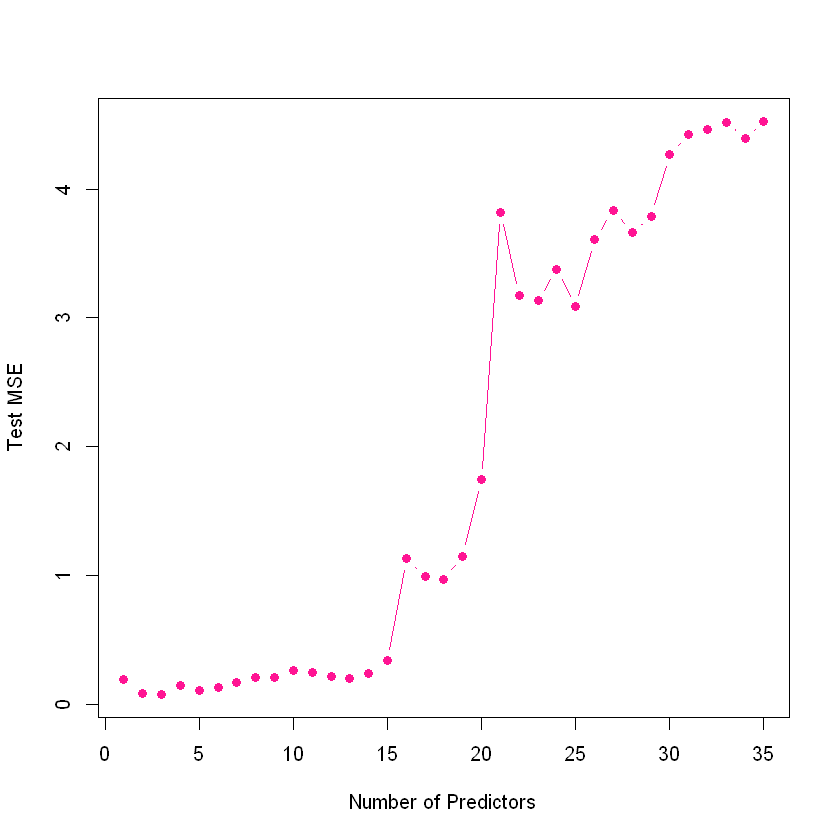

In [160]:
test.mat = model.matrix(Price~., data = test.cereal, nvmax = 35)
val.errors = rep(NA, 35)
for (i in 1:35) {
    coefi = coef(bestsub, id = i)
    pred = test.mat[, names(coefi)] %*% coefi
    val.errors[i] = mean((pred - test.cereal$Price)^2)
}
plot(val.errors, xlab = "Number of Predictors", ylab = "Test MSE", pch = 19, type = "b",col="deeppink")

In [161]:
which.min(val.errors)

[1] 3

In [162]:
coef(bestsub,which.min(val.errors))

(Intercept) Dietary.Fiber       Thiamin    Vitamin.B6 
  4.831740482   0.071023420  -0.008859163   0.011297654

Using best subset selection, we see that our best subset consists only of the variable Dietary Fiber.

In [163]:
predict.regsubsets = function(object, newdata, id, ...){
  form = as.formula(object$call[[2]])
  mat = model.matrix(form, newdata)
  coefi = coef(object, id=id)
  xvars = names(coefi)
  mat[,xvars]%*%coefi
}

In [164]:
bestsub.MSE = val.errors[1]
bestsub.MSE

[1] 0.1913468

Using best subset selection, we have a MSE of 0.191. Now I will perform ridge regression.

In [165]:
train.mat = model.matrix(Price~., data = train.cereal)
test.mat = model.matrix(Price~., data = test.cereal)

We need a grid that will include a wide range of possibilities for lambda.

In [166]:
grid = 10^seq(4,-2,length=100)

Now we must fit the ridge regression model.

In [167]:
library(glmnet)
ridge = glmnet(train.mat,train.cereal$Price,alpha=0,lambda=grid)

We must find the lambda that gives the minimum MSE by cross validation on the training set.

In [168]:
cv.ridge = cv.glmnet(train.mat,train.cereal$Price, alpha=0,lambda = grid)

We can plot the log(Lambda) vs MSE.

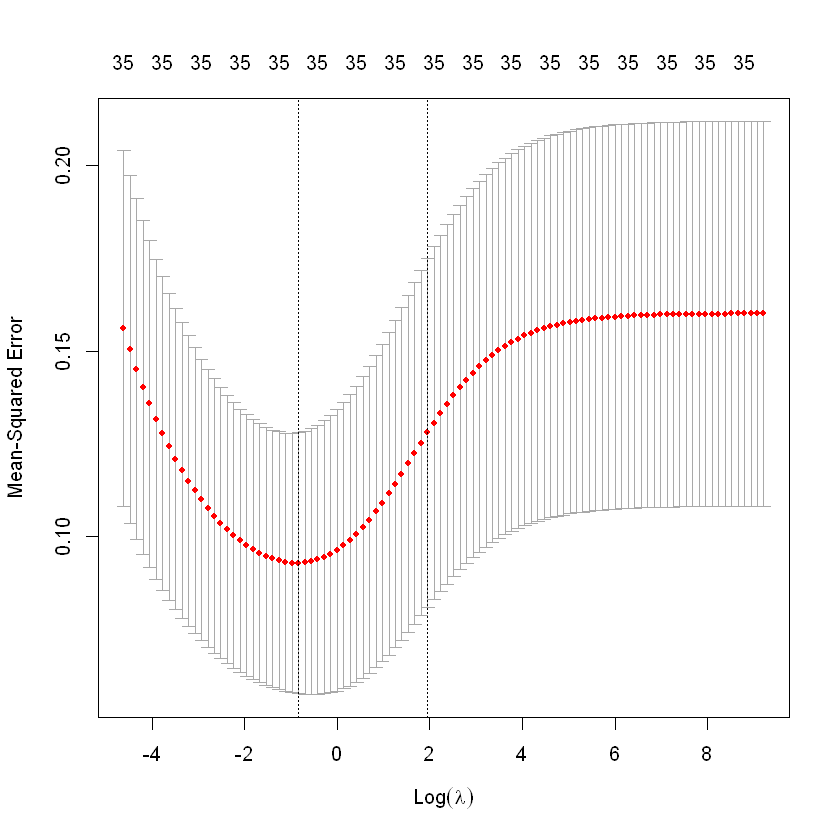

In [169]:
plot(cv.ridge)

We find the best lambda by find the lambda with the mininium MSE on the trainging data.

In [170]:
bestlam = cv.ridge$lambda.min
bestlam

[1] 0.4328761

We can see our best lambda is when $\lambda=0.433$. Then we fit the ridge regression model for when $\lambda=0.433$.

In [171]:
ridge.cereal = glmnet(train.mat, train.cereal$Price, alpha=0, lambda = bestlam)
coef(ridge.cereal)

37 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)         4.623026e+00
(Intercept)         .           
Manufacturer       -3.616440e-02
CFBAI.UNC           5.299872e-02
CFBAI.Approved     -6.135886e-02
Size                1.786449e-02
Shelf               2.077227e-02
Location            7.967861e-03
Serving.Size        1.282481e-04
Calories           -1.931820e-04
Total.Fat          -9.059760e-03
Saturated.Fat       9.650006e-03
Sodium             -2.056066e-04
Potassium           1.771162e-04
Total.Carbohydrate  1.239392e-05
Dietary.Fiber       1.605841e-02
Sugar              -7.268247e-03
Protein             6.816275e-03
Vitamin.A           1.560656e-03
Vitamin.C          -1.487029e-04
Calcium             2.997548e-03
Iron                2.696031e-04
Vitamin.D          -2.367268e-04
Vitamin.E          -1.060994e-03
Thiamin            -1.293564e-03
Riboflavin          8.102491e-04
Niacin              5.292246e-04
Pantothenic.Acid   -9.373964e-04
V

We use $\lambda=0.433$ directly on the testing data to get the predicted values and find the MSE.

In [172]:
pred.ridge = predict(ridge, s=bestlam, newx=test.mat)
ridge.MSE = mean((test.cereal$Price-pred.ridge)^2)
ridge.MSE

[1] 0.1017991

Using ridge regression, we have a MSE of 0.102. So far, best subset selection is the best model based on a lower MSE. I will perform lasso regression. 

In [173]:
lasso = glmnet(train.mat,train.cereal$Price, alpha=1,lambda=grid)

We find lambda by cross validation on the training set.

In [174]:
cv.lasso = cv.glmnet(train.mat, train.cereal$Price, alpha=1, lambda=grid)

We can plot log(Lambda) vs MSE.

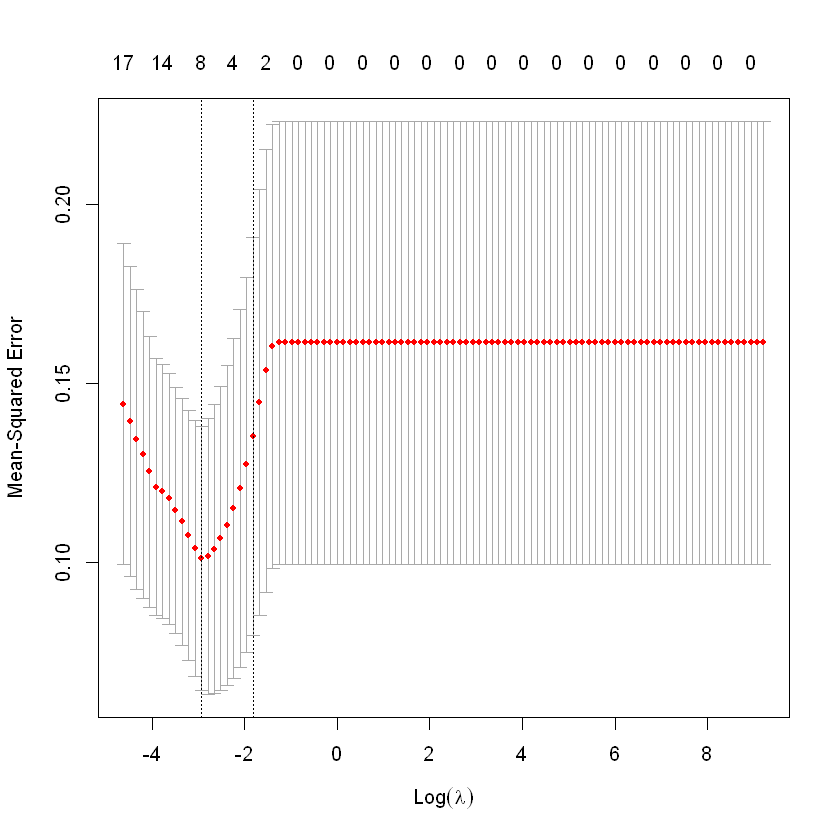

In [175]:
plot(cv.lasso)

We can find the best lambda by finding the lambda that minimizes MSE on the training set.

In [176]:
bestlam.lasso = cv.lasso$lambda.min
bestlam.lasso

[1] 0.05336699

Our best lambda is when $\lambda=0.053$. We fit the lasso model with $\lambda=0.053$. 

In [177]:
lasso.cereal = glmnet(train.mat, train.cereal$Price, alpha=1, lambda=bestlam.lasso)
coef(lasso.cereal)

37 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)         4.622098373
(Intercept)         .          
Manufacturer       -0.018607742
CFBAI.UNC           0.009142607
CFBAI.Approved      .          
Size                0.021273481
Shelf               .          
Location            .          
Serving.Size        .          
Calories            .          
Total.Fat           .          
Saturated.Fat       .          
Sodium              .          
Potassium           .          
Total.Carbohydrate  .          
Dietary.Fiber       0.029133488
Sugar              -0.007997310
Protein             .          
Vitamin.A           .          
Vitamin.C           .          
Calcium             .          
Iron                .          
Vitamin.D           .          
Vitamin.E           .          
Thiamin             .          
Riboflavin          .          
Niacin              .          
Pantothenic.Acid    .          
Vitamin.B6          0.00180046

We use $\lambda=0.035$ on the testing data to get the predicted values and find the MSE.

In [178]:
pred.lasso = predict(lasso, s=bestlam.lasso, newx = test.mat)
lasso.MSE = mean((test.cereal$Price-pred.lasso)^2)
lasso.MSE

[1] 0.1014699

When using lasso regression, we have a MSE of 0.101. I will perform multiple regression on the full model.

In [179]:
lm = lm(Price~., data = train.cereal)
lm.predict = predict(lm, test.cereal)
lm.MSE = mean((lm.predict-test.cereal$Price)^2) 
lm.MSE

[1] 4.526694

We get a MSE of 4.53.

In [180]:
bestsub.MSE
ridge.MSE
lasso.MSE
lm.MSE

[1] 0.1913468

[1] 0.1017991

[1] 0.1014699

[1] 4.526694

Comparing these models, we can conclude best subset selection is best with the lowest MSE of 0.101. Since best subset selection choose dietary fiber as the only significant predictor for price, we will look at a scatterplot and a linear model using grams of dietary fiber to predict price of cereal.

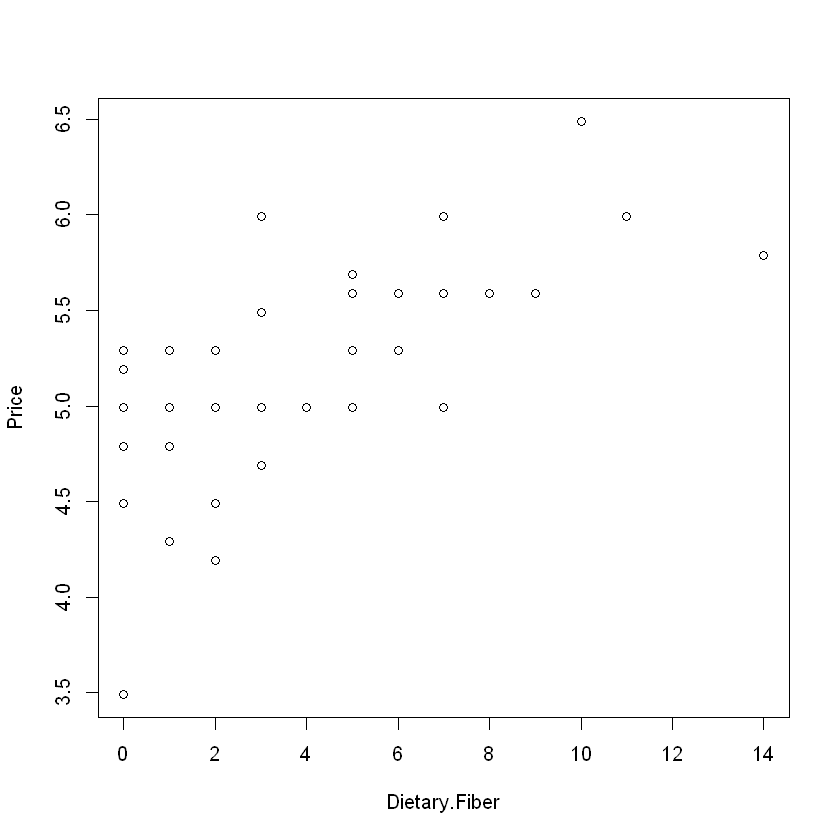

In [181]:
plot(Dietary.Fiber, Price)

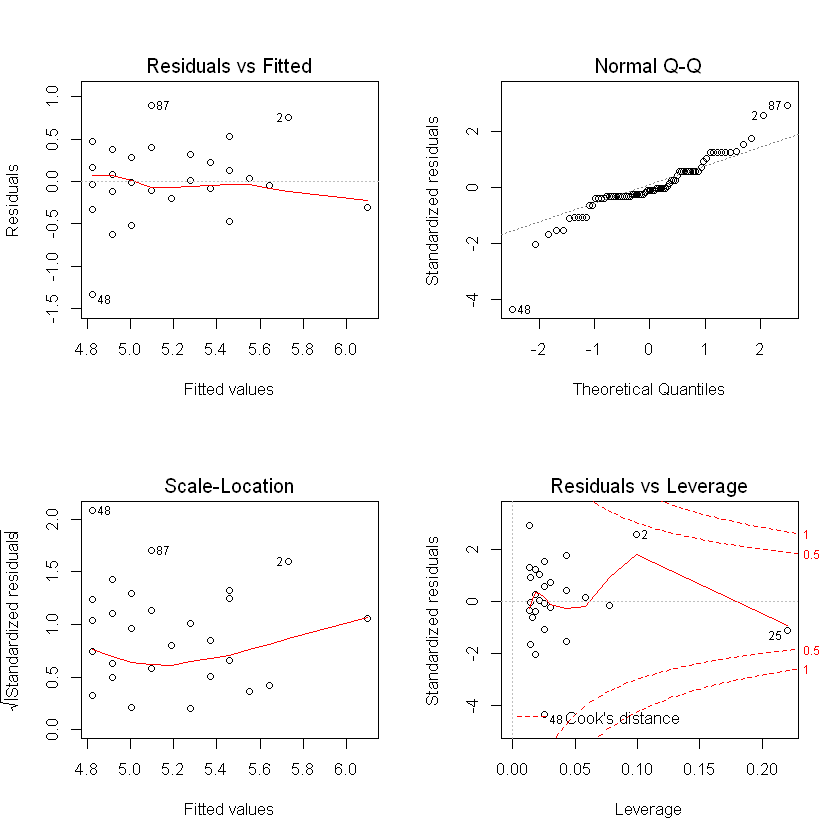

In [183]:
lm2 = lm(Price~Dietary.Fiber, data = new.cereal)
par(mfrow=c(2,2))
plot(lm2)

In [182]:
summary(lm2)


Call:
lm(formula = Price ~ Dietary.Fiber, data = new.cereal)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33195 -0.10545 -0.03195  0.16805  0.89455 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.82195    0.04928  97.844  < 2e-16 ***
Dietary.Fiber  0.09117    0.01251   7.286 2.87e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3103 on 74 degrees of freedom
Multiple R-squared:  0.4177,	Adjusted R-squared:  0.4099 
F-statistic: 53.09 on 1 and 74 DF,  p-value: 2.867e-10


The scatterplot and  Residual Diagnostic Plots show that there is a linear relationship between fiber and price of cereal. Using the summary, we can see that for every added gram of fiber in a cereal, the price will increase by approximately $0.09.

# Classification
Quaker does not participate in the Children's Food and Beverage Advertising Initiative Program, so the 10 Quaker cereals have missing values for the variable CFBAI.Approved. These cereals form a natural test set; that is, we do not know their values. I will explore several different methods for predicting whether the cereal would be approved for advertising to children to assess and select the model that is best for predicting CFBAI.Approved. 

Some cereals are not approved because they fail to meet nutritional standards, while others are not approved because the company does not intend to advertise them to children. 

In order to be approved, the cereal must first meet the CFBAI criteria. This criteria is used to determine what foods could be advertised to children. It sets limits on calories, saturated fat, sodium, and sugar, and minimum contribution levels for important food groups or essential nutrients. 

First, I will look at the relationship between CFBAI.UNC and CFBAI.Approved. 

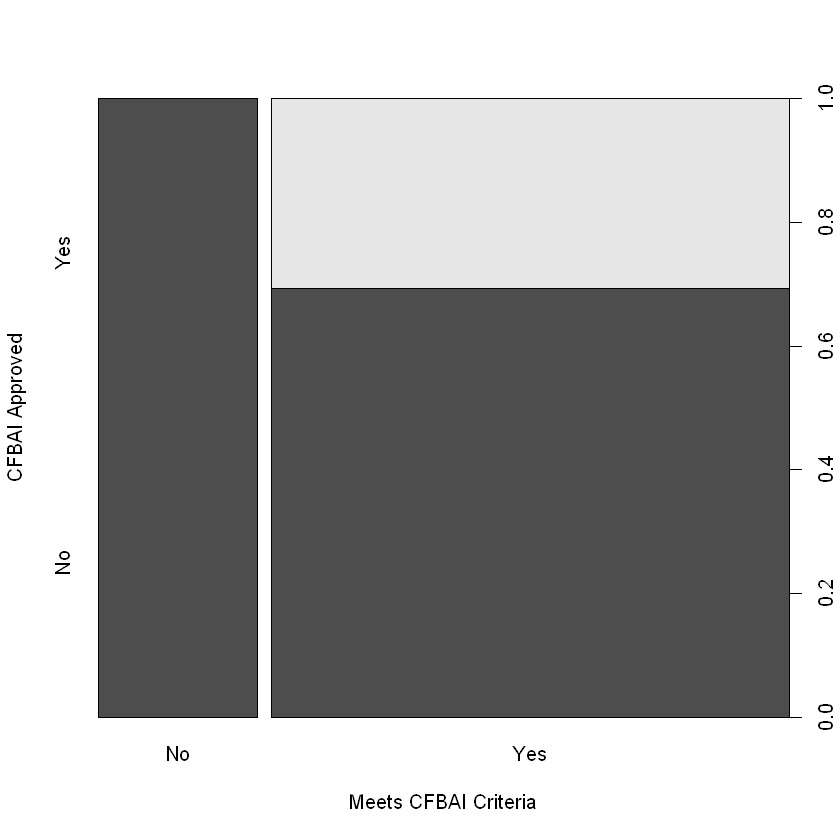

In [184]:
plot(cereal$CFBAI.UNC,cereal$CFBAI.Approved, xlab = "Meets CFBAI Criteria", ylab = "CFBAI Approved")

From the plot above, we can see that if a cereal does not meet the CFBAI criteria, it cannot be approved. However, if a cereal does meet the CFBAI criteria it may or not be approved. Since we can accurately predict that a cereal will not be approved if it does not meet the criteria, we can look at only the data that does meet the CFBAI criteria. 

In [185]:
new.cereal2 = cereal %>% filter(!is.na(CFBAI.UNC)) %>% mutate(Cereal.Name = NULL) %>% filter(CFBAI.UNC=="Yes")

In [186]:
new.cereal2 = na.omit(new.cereal2)

I will perform K-Nearest Neighbors.

In [188]:
library(parsnip)  
library(kknn)  
library(rsample)

In [189]:
set.seed(487)
cereal_splits = initial_split(new.cereal2, prop = 0.75)  
cereal.train = training(cereal_splits)
cereal.validation = testing(cereal_splits)

In [190]:
K = 10
k10.tidy = nearest_neighbor(mode = "classification", neighbors = K, dist_power = 2) %>%  
  set_engine("kknn") %>%
  fit(formula = CFBAI.Approved ~ ., data = cereal.train)

In [191]:
predicted.k10.tidy = predict(k10.tidy, new_data = cereal.validation)

In [192]:
table(predicted.k10.tidy$.pred_class, cereal.validation$CFBAI.Approved, dnn = c("Predicted","Actual"))

         Actual
Predicted No Yes
      No   9   0
      Yes  4   1

In [194]:
knn.mse = 4/14
knn.mse

[1] 0.2857143

K-Nearest Neighbors gives us a misclassification rate of 28.6%. I will performing random forest.

In [196]:
library(ranger)

In [197]:
rf.class = ranger(CFBAI.Approved ~ ., data = cereal.train, importance = "permutation", write.forest = TRUE, seed = 573)
rf.class

normalized.importance.class = importance(rf.class)/max(importance(rf.class))*100 # normalized to 100%
normalized.importance.class

Ranger result

Call:
 ranger(CFBAI.Approved ~ ., data = cereal.train, importance = "permutation",      write.forest = TRUE, seed = 573) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      45 
Number of independent variables:  35 
Mtry:                             5 
Target node size:                 1 
Variable importance mode:         permutation 
Splitrule:                        gini 
OOB prediction error:             15.56 % 

Manufacturer          CFBAI.UNC               Size              Shelf 
         4.4290369          0.0000000         12.7911655         -0.5194812 
          Location              Price       Serving.Size           Calories 
       100.0000000         18.2972161         28.8734884          6.1214487 
         Total.Fat      Saturated.Fat             Sodium          Potassium 
         1.8899810         -1.3539651         12.9504045          1.4651501 
Total.Carbohydrate      Dietary.Fiber              Sugar            Protein 
        10.6101147          4.2757035         13.4924417          7.2241464 
         Vitamin.A          Vitamin.C            Calcium               Iron 
         3.3543443         -2.0642490          1.8682778         20.2907899 
         Vitamin.D          Vitamin.E            Thiamin         Riboflavin 
         2.8653146          1.9063169          1.3865535          1.9892972 
            Niacin   Pantothenic.Acid         Vitamin.B6         Folic.Acid 
         2.9829114          0.2566396          0.9868282         14.9000774 
       Vitamin.B12               Zinc          Magnesium         Phosphorus 
         0.8322060          2.8801982          7.9573157          2.9125460 
          Selenium             Copper          Manganese 
         0.0000000          0.1081283          0.0000000

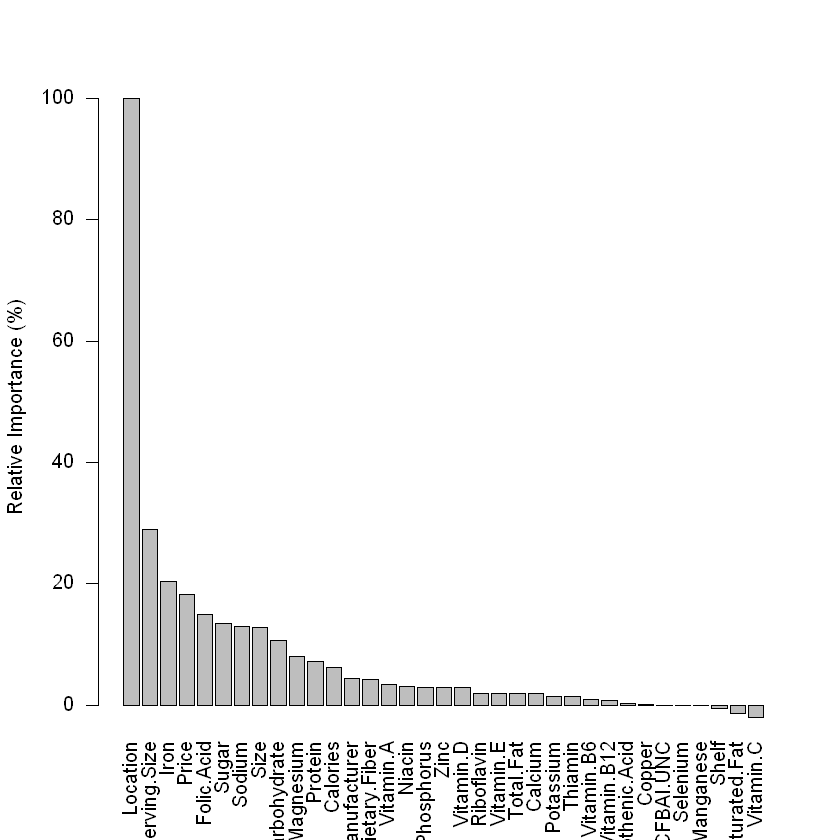

In [198]:
barplot(sort(normalized.importance.class, decreasing = TRUE), ylab = "Relative Importance (%)", las = 2  )

In [199]:
rf.class.predict = predict(rf.class, data = cereal.validation)
rf.accuracy = tibble(actual = cereal.validation$CFBAI.Approved, predicted = rf.class.predict$predictions)

In [203]:
library(yardstick)

In [204]:
accuracy(rf.accuracy, truth = actual, estimate = predicted)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7857143


Overall, we get a 78.6% accuracy rate using random forests. This is a misclassification rate of 21.4%.

In [205]:
conf_mat(rf.accuracy, truth = actual, estimate = predicted)

          Truth
Prediction No Yes
       No  10   0
       Yes  3   1

I will perform bagging.

In [206]:
new.cereal3 = new.cereal2 %>% mutate(Manufacturer = as.numeric(Manufacturer))%>% mutate(CFBAI.Approved = as.numeric(CFBAI.Approved))
new.cereal3 = na.omit(new.cereal3)

In [207]:
set.seed(594)
cereal_splits = initial_split(new.cereal3, prop = 0.75)  
cereal.train = training(cereal_splits)
cereal.validation = testing(cereal_splits)

In [208]:
bag = ranger(CFBAI.Approved ~ ., data = cereal.train, mtry = 35, importance = "permutation", write.forest = TRUE, seed = 465)
bag.predict = predict(bag, data = cereal.validation)
bag.mse = mean((cereal.validation$CFBAI.Approved-bag.predict$predictions)^2)
bag.mse 

[1] 0.2597715

We get a misclassifiation rate of 26% when we use bagging, which is lower than knn but greater than random forests. However, we can see that location has a 100% relative importance rate.

In [209]:
library(rpart)

In [210]:
tree.approve = rpart(CFBAI.Approved~., data = new.cereal2)
summary(tree.approve)

Call:
rpart(formula = CFBAI.Approved ~ ., data = new.cereal2)
  n= 59 

         CP nsplit rel error    xerror      xstd
1 0.5263158      0 1.0000000 1.0000000 0.1888979
2 0.0100000      1 0.4736842 0.4736842 0.1453539

Variable importance
  Location       Iron Folic.Acid      Sugar       Size      Price 
        29         17         14         14         13         12 

Node number 1: 59 observations,    complexity param=0.5263158
  predicted class=No   expected loss=0.3220339  P(node) =1
    class counts:    40    19
   probabilities: 0.678 0.322 
  left son=2 (35 obs) right son=3 (24 obs)
  Primary splits:
      Location     < 4.5  to the right, improve=12.074620, (0 missing)
      Serving.Size < 29.5 to the right, improve= 8.644763, (0 missing)
      Iron         < 32.5 to the right, improve= 6.693587, (0 missing)
      Sodium       < 175  to the right, improve= 5.082712, (0 missing)
      Sugar        < 8.5  to the left,  improve= 5.082712, (0 missing)
  Surrogate splits:
      I

n= 59 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 59 19 No (0.67796610 0.32203390)  
  2) Location>=4.5 35  2 No (0.94285714 0.05714286) *
  3) Location< 4.5 24  7 Yes (0.29166667 0.70833333) *

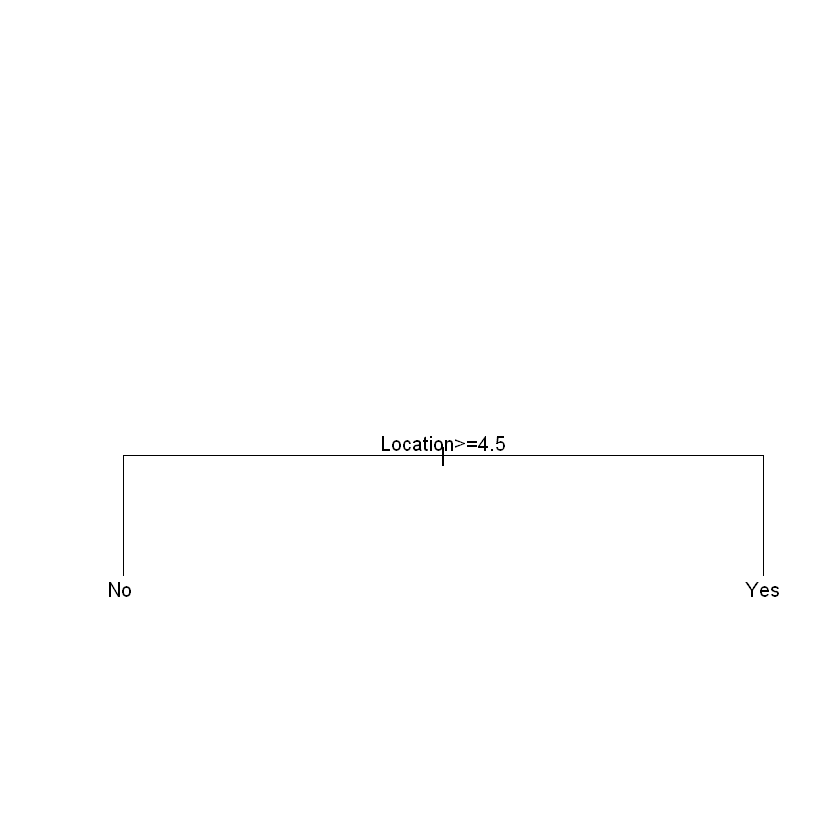

In [211]:
plot(tree.approve, uniform = TRUE, ylim = c(0, 1.2))
text(tree.approve, pretty = 0)
tree.approve

Using trees, we can see that cereal with location greater or equal to 4.5 would not be approved to market to childen and a location less than 4.5 would be approved.

During my analysis of the cereal data, I have found some interesting results. I have discovered that Kellogg's, General Mills, Post, and Quaker produce cereal with similar levels of sodium, saturated fat, and calories. Through my analysis, I found that the price of cereal depends on the amount of fiber it contains. I also found that cereal that is approved to be marketed to children  depends on the location in which the box's tag is located, which was a very odd find. In order to be meet the CFBAI nutritional criteria, a cereal must have certain limits on calories, saturated fat, sodium, and sugar. One question that I found myself asking was what would make a manufacturer not want to advertise their cereal to children. 